In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Load the data into a Pandas DataFrame
crypto_df = pd.read_csv('/Users/stephannieadey/Desktop/Assignments/Crypto Clustering/Resources/crypto_market_data.csv', index_col='coin_id')

# Display sample data
crypto_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
crypto_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
crypto_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_df)

In [6]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_df = pd.DataFrame(scaled_data, columns=crypto_df.columns, index=crypto_df.index)

# Display the first few rows of the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

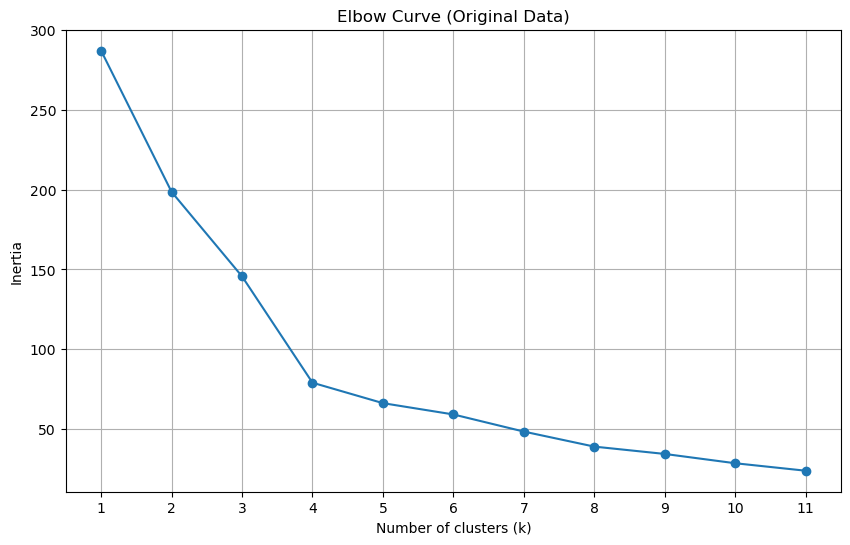

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plotting the elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve (Original Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [12]:
best_k = 4

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialise the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [14]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)

KMeans(n_clusters=4, random_state=0)

In [15]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_df)

# Print the resulting array of cluster values.
print('Cluster values:', clusters)

Cluster values: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [16]:
# Create a copy of the DataFrame
crypto_clustered_df = crypto_df.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
crypto_clustered_df['Cluster'] = clusters

# Display sample data
crypto_clustered_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


In [19]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
crypto_clustered_df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', hover_cols=['coin_id'])


:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)

In [21]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_df.index)
# View the first five rows of the DataFrame. 

pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [22]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

# Explained variance
explained_variance = pca.explained_variance_ratio_
print('Explained variance by each principal component:', explained_variance)
print('Total explained variance:', explained_variance.sum())

Explained variance by each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.8950316570309842.

---

### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [24]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0)
    kmeans_pca.fit(pca_df)
    inertia_pca.append(kmeans_pca.inertia_)

In [25]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

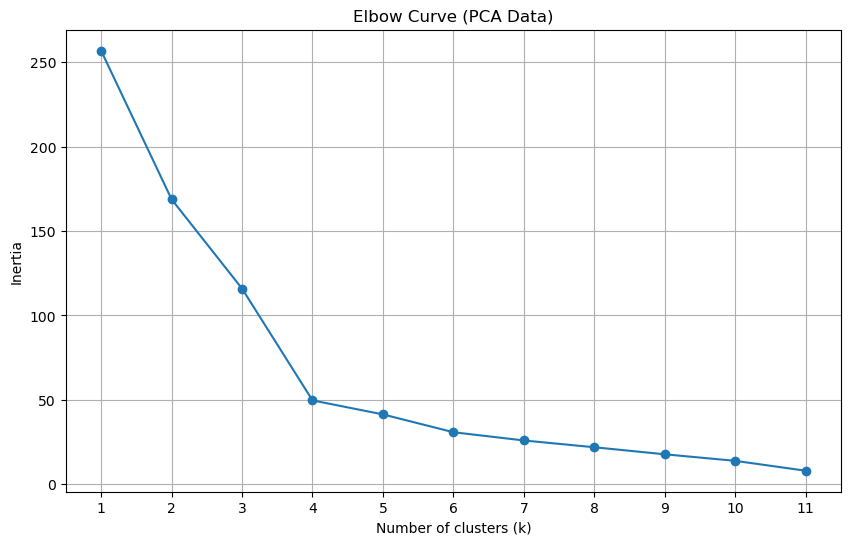

In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best value for k when using the PCA data is the value where the inertia starts to decrease more slowly, indicating the "elbow" point in the Elbow curve. Based on the previous analysis, the best value for k can be observed around 4. Therefore, the best value for k using the PCA data is 4.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
No, it does not differ. The best k value found using the original data is also 4. This indicates that the optimal number of clusters for the cryptocurrency data remains consistent even after applying PCA for dimensionality reduction.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [27]:
# Initialise the K-Means model using the best value for k
best_k_pca = 4
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

In [28]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

KMeans(n_clusters=4, random_state=0)

In [29]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print('Cluster values:', clusters_pca)


Cluster values: [2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [30]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df['Cluster'] = clusters_pca

# Display sample data
pca_clustered_df.head(10)

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [31]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_clustered_df.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols=['coin_id'])


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [32]:
# Composite plot to contrast the Elbow curves
elbow_plot_original = elbow_df.hvplot.line(x='k', y='inertia', title='Elbow Curve (Original Data)', line_color='blue')
elbow_plot_pca = elbow_df_pca.hvplot.line(x='k', y='inertia', title='Elbow Curve (PCA Data)', line_color='green')
(elbow_plot_original + elbow_plot_pca).cols(2)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [33]:
# Composite plot to contrast the clusters
cluster_plot_original = crypto_clustered_df.hvplot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', by='Cluster', hover_cols=['coin_id'], title='Clusters (Original Data)')
cluster_plot_pca = pca_clustered_df.hvplot.scatter(x='PC1', y='PC2', by='Cluster', hover_cols=['coin_id'], title='Clusters (PCA Data)')
(cluster_plot_original + cluster_plot_pca).cols(2)

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  
  Using fewer features to cluster the data with K-Means, as achieved through Principal Component Analysis (PCA), has several impacts:

  Simplicity and Efficiency: By reducing the number of features, PCA simplifies the data, making the clustering process more efficient. The computational complexity is reduced, leading to faster convergence of the K-Means algorithm.

  Cluster Compactness and Separation: The clusters formed using the PCA-reduced data tend to be more compact and distinct. This is because PCA captures the most significant variance in the data, focusing on the features that contribute the most to the clustering structure. As a result, the clusters are easier to distinguish and analyse.

  Preservation of Variance: Although the dimensionality is reduced, PCA ensures that most of the data's variance is preserved. This means that the essential patterns and relationships in the data are retained, leading to meaningful and interpretable clusters.

  Visualisation: With fewer features, visualising the clusters becomes more straightforward. For example, with PCA reducing the data to three principal components, it is easier to create 2D and 3D scatter plots that clearly show the cluster separation.

  Potential Loss of Information: While PCA retains most of the variance, some information may be lost in the dimensionality reduction process. This can lead to less precise clustering in some cases, especially if the discarded features contain relevant information for distinguishing between clusters.

  Overall, using fewer features through PCA optimization helps in achieving more efficient, interpretable, and visually discernible clusters, although it may involve a trade-off with the potential loss of some information.